In [2]:
import pandas as pd

# Load data into a Pandas DataFrame
df = pd.read_excel(r"E:\Msc Tiss\Competitions\Masters_Union\Data_file.xlsx")

# Print the first five rows of the DataFrame
print(df.head())


  show_id     type                             title         director  \
0      p1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      p3  TV Show                         Ganglands  Julien Leclercq   
2      p6  TV Show                     Midnight Mass    Mike Flanagan   
3     p14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      p8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [3]:
# Group data by type and rating
grouped = df.groupby(['type', 'rating'])

# Calculate the mean rating for each group
mean_ratings = grouped.mean()

# Sort the data by rating
sorted_ratings = mean_ratings.sort_values(by='rating', ascending=False)

# Print the top-rated movies and TV shows
print(sorted_ratings.head())


                  release_year
type    rating                
Movie   UR         1999.333333
TV Show TV-Y7-FV   2014.000000
Movie   TV-Y7-FV   2015.000000
TV Show TV-Y7      2015.412371
Movie   TV-Y7      2015.647482


In [4]:
# Check for missing values
print(df.isnull().sum())



show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


<AxesSubplot:title={'center':'Number of TV Shows/Movies released by Year'}, xlabel='release_year'>

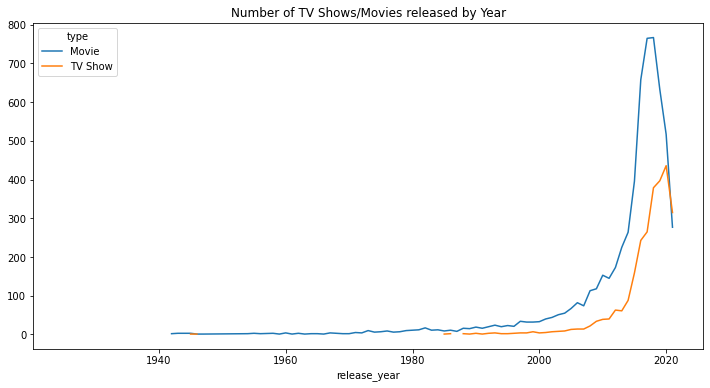

In [5]:
# Group data by release year and type
grouped = df.groupby(['release_year', 'type'])

# Calculate the count of each group
count_data = grouped.size().reset_index(name='count')

# Pivot the data to create a separate column for each type
pivot_data = count_data.pivot(index='release_year', columns='type', values='count')

# Plot the data
pivot_data.plot(kind='line', figsize=(12,6), title='Number of TV Shows/Movies released by Year')


#### Relationship between country and the number of TV shows/movies added to Netflix:

<AxesSubplot:title={'center':'Number of TV Shows/Movies Added to platform by Country'}, xlabel='country'>

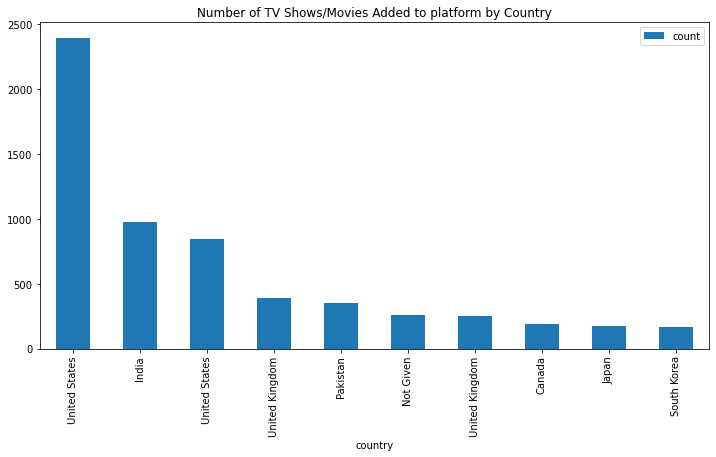

In [6]:
# Group data by country and type
grouped = df.groupby(['country', 'type'])

# Calculate the count of each group
count_data = grouped.size().reset_index(name='count')

# Sort the data by count in descending order
sorted_data = count_data.sort_values(by='count', ascending=False)

# Plot the top 10 countries
top_countries = sorted_data.head(10)
top_countries.plot(kind='bar', x='country', y='count', figsize=(12,6), title='Number of TV Shows/Movies Added to platform by Country')


### Relationship between rating and no of tv shows

<AxesSubplot:title={'center':'Number of TV Shows/Movies by Rating'}, xlabel='rating'>

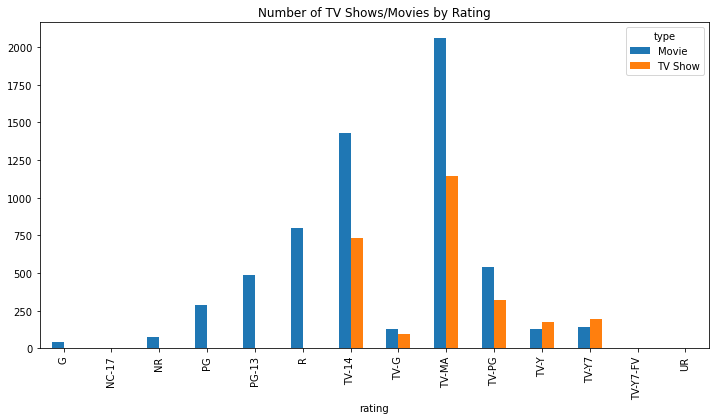

In [7]:
# Group data by rating and type
grouped = df.groupby(['rating', 'type'])

# Calculate the count of each group
count_data = grouped.size().reset_index(name='count')

# Pivot the data to create a separate column for each type
pivot_data = count_data.pivot(index='rating',columns='type',  values='count')

# Plot the data
pivot_data.plot(kind='bar', figsize=(12,6), title='Number of TV Shows/Movies by Rating')


### Relationship between country and duration of movies

In [8]:
# Convert 'duration' column to numerical format
df['duration_float'] = df['duration'].str.extract('(\d+)', expand=False).astype(float)

# Check data types
print(df.dtypes)

show_id            object
type               object
title              object
director           object
country            object
date_added         object
release_year        int64
rating             object
duration           object
listed_in          object
duration_float    float64
dtype: object


<AxesSubplot:title={'center':'Median Duration of Movies by Country'}, xlabel='country'>

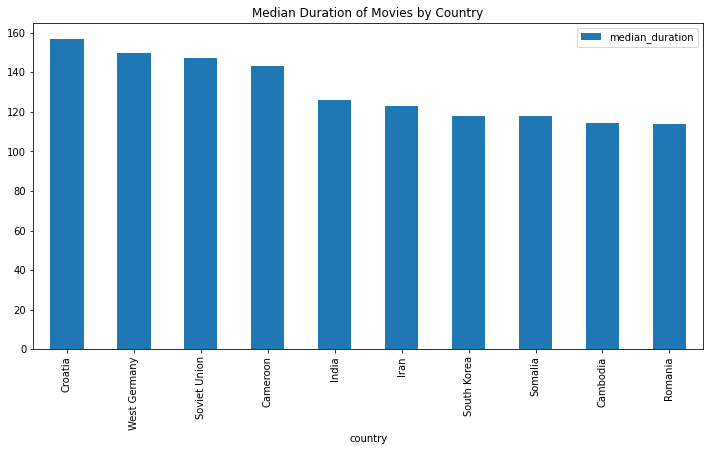

In [9]:
# Filter data to only include movies
movies = df[df['type'] == 'Movie']

# Group data by country and calculate the median duration
grouped = movies.groupby('country')['duration_float'].median().reset_index(name='median_duration')

# Sort the data by median duration in descending order
sorted_data = grouped.sort_values(by='median_duration', ascending=False)

# Plot the top 10 countries
top_countries = sorted_data.head(10)
top_countries.plot(kind='bar', x='country', y='median_duration', figsize=(12,6), title='Median Duration of Movies by Country')


<AxesSubplot:title={'center':'Median Duration of Movies by Rating'}, xlabel='rating'>

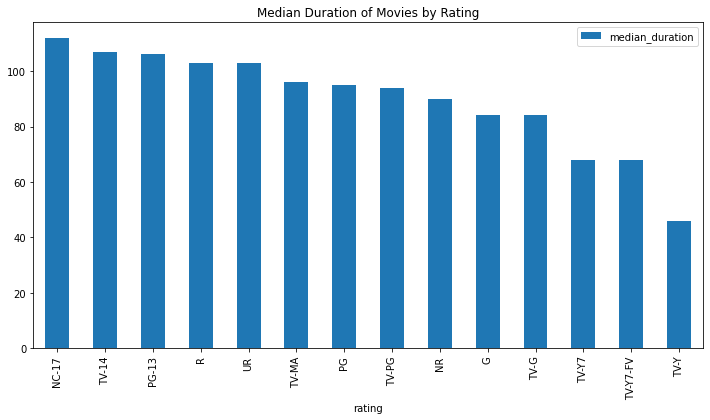

In [10]:
# Filter data to only include movies
movies = df[df['type'] == 'Movie']

# Group data by rating and calculate the median duration
grouped = movies.groupby('rating')['duration_float'].median().reset_index(name='median_duration')

# Sort the data by median duration in descending order
sorted_data = grouped.sort_values(by='median_duration', ascending=False)

# Plot the data
sorted_data.plot(kind='bar', x='rating', y='median_duration', figsize=(12,6), title='Median Duration of Movies by Rating')


<AxesSubplot:title={'center':'Mean Number of Seasons of TV Shows by Country'}, xlabel='country'>

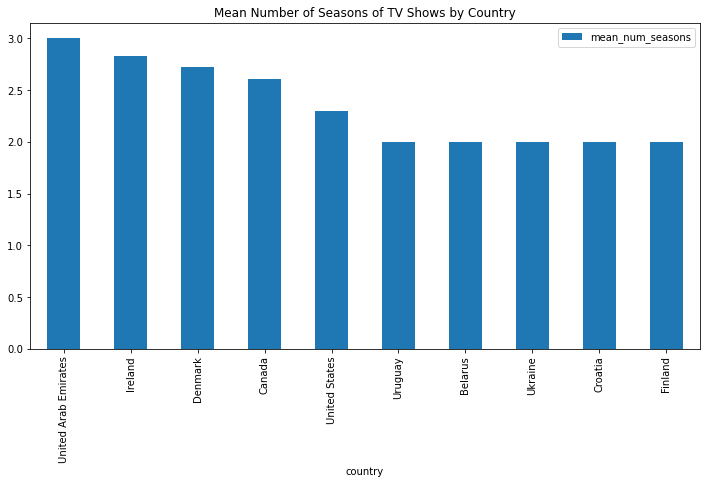

In [11]:
# Filter data to only include TV shows
tv_shows = df[df['type'] == 'TV Show']

# Group data by country and calculate the mean number of seasons
grouped = tv_shows.groupby('country')['duration'].apply(lambda x: x.str.split(' ').str[0].astype(float).mean()/1.0).reset_index(name='mean_num_seasons')

# Sort the data by mean number of seasons in descending order
sorted_data = grouped.sort_values(by='mean_num_seasons', ascending=False)

# Plot the top 10 countries
top_countries = sorted_data.head(10)
top_countries.plot(kind='bar', x='country', y='mean_num_seasons', figsize=(12,6), title='Mean Number of Seasons of TV Shows by Country')


<AxesSubplot:title={'center':'Mean Number of Seasons of TV Shows by Release Year'}, xlabel='release_year'>

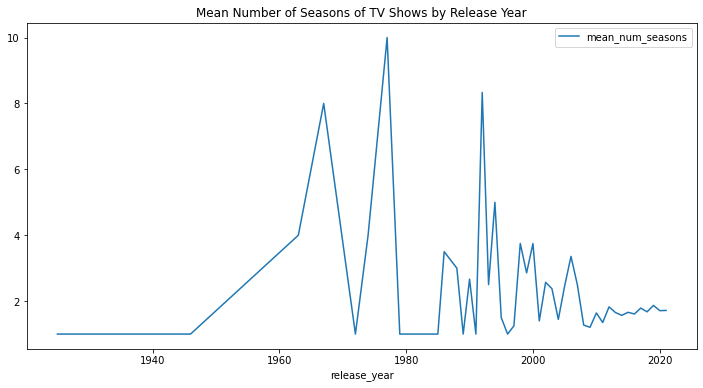

In [12]:
# Filter data to only include TV shows
tv_shows = df[df['type'] == 'TV Show']

# Group data by release year and calculate the mean number of seasons
grouped = tv_shows.groupby('release_year')['duration'].apply(lambda x: x.str.split(' ').str[0].astype(float).mean()/1.0).reset_index(name='mean_num_seasons')

# Plot the data
grouped.plot(kind='line', x='release_year', y='mean_num_seasons', figsize=(12,6), title='Mean Number of Seasons of TV Shows by Release Year')


<AxesSubplot:title={'center':'Mean Number of Seasons of TV Shows by Rating'}, xlabel='rating'>

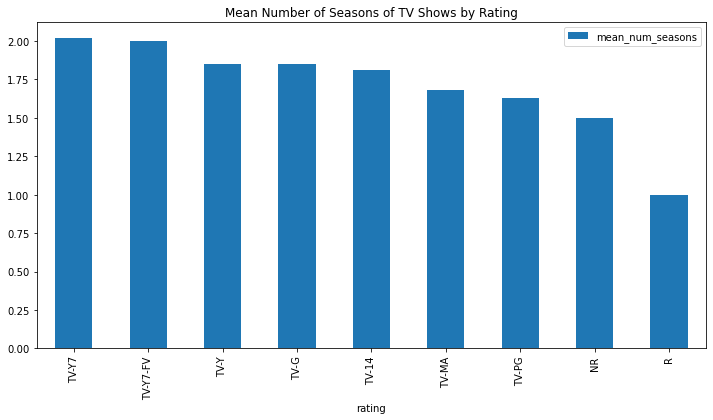

In [13]:
# Filter data to only include TV shows
tv_shows = df[df['type'] == 'TV Show']

# Group data by rating and calculate the mean number of seasons
grouped = tv_shows.groupby('rating')['duration'].apply(lambda x: x.str.split(' ').str[0].astype(float).mean()/1.0).reset_index(name='mean_num_seasons')

# Sort the data by mean number of seasons in descending order
sorted_data = grouped.sort_values(by='mean_num_seasons', ascending=False)

# Plot the data
sorted_data.plot(kind='bar', x='rating', y='mean_num_seasons', figsize=(12,6), title='Mean Number of Seasons of TV Shows by Rating')


<AxesSubplot:title={'center':'Number of Titles by Director'}, xlabel='director'>

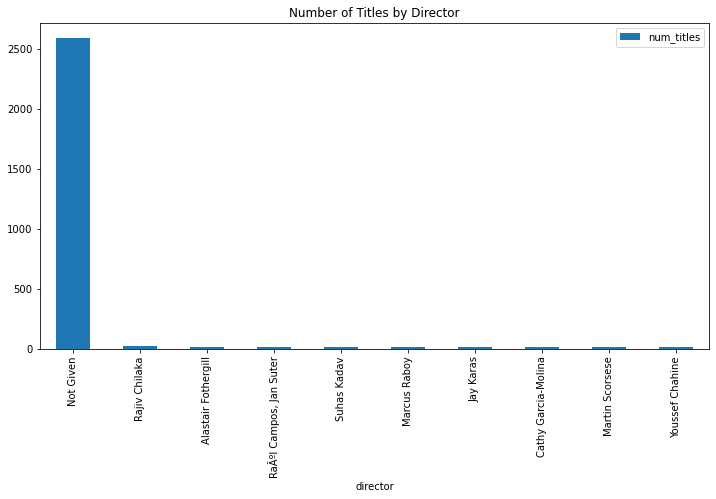

In [14]:
# Group data by director and count the number of titles
grouped = df.groupby('director')['title'].count().reset_index(name='num_titles')

# Sort the data by number of titles in descending order
sorted_data = grouped.sort_values(by='num_titles', ascending=False)

# Plot the top 10 directors
top_directors = sorted_data.head(10)
top_directors.plot(kind='bar', x='director', y='num_titles', figsize=(12,6), title='Number of Titles by Director')


<AxesSubplot:title={'center':'Number of Titles by Director'}, xlabel='director'>

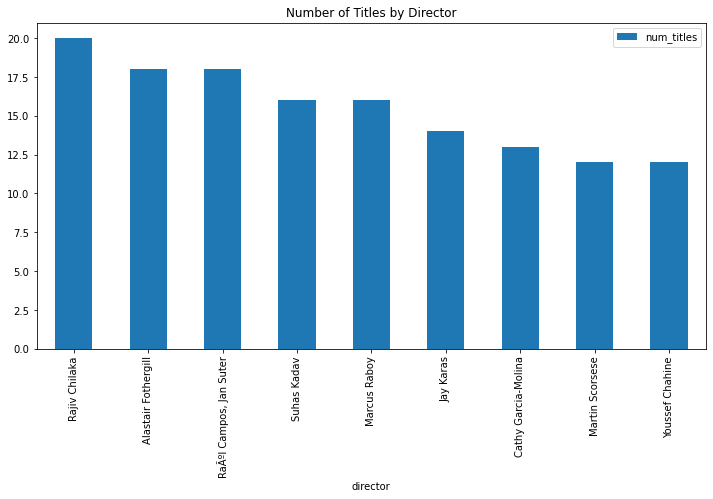

In [24]:
# Group data by director and count the number of titles
grouped = df.groupby('director')['title'].count().reset_index(name='num_titles')

# Sort the data by number of titles in descending order
sorted_data = grouped.sort_values(by='num_titles', ascending=False)

# Select the rows corresponding to the top 2 to 10 directors
top_directors = sorted_data.iloc[1:10]

# Plot the top 2 to 10 directors
top_directors.plot(kind='bar', x='director', y='num_titles', figsize=(12,6), title='Number of Titles by Director')


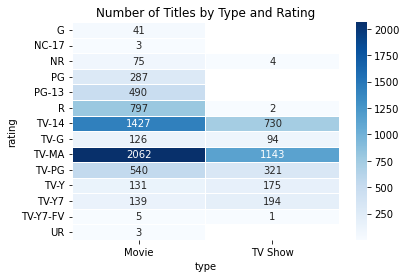

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# Group data by type and rating and count the number of titles
grouped = df.groupby(['type', 'rating'])['title'].count().reset_index(name='num_titles')

# Pivot the data to create a heatmap
heatmap_data = grouped.pivot(index='rating', columns='type', values='num_titles')

# Plot the data as a heatmap
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='.0f', linewidths=.5)
plt.title('Number of Titles by Type and Rating')
plt.show()


<AxesSubplot:title={'center':'Number of Titles Added by Month/Year'}, xlabel='year_added'>

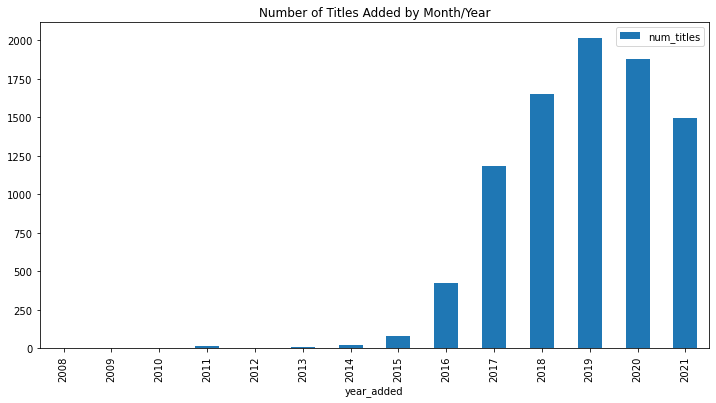

In [31]:
# Convert date_added to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract the month/year from date_added
df['year_added'] = df['date_added'].dt.year

# Group data by month/year added and count the number of titles
grouped = df.groupby(['year_added'])['title'].count().reset_index(name='num_titles')

# Plot the data
grouped.plot(kind='bar', x='year_added', y='num_titles', figsize=(12,6), title='Number of Titles Added by Month/Year')


In [34]:
# count the number of directors in each row of the "directors" column
df['num_directors'] = df['director'].apply(lambda x: len(str(x).split(',')))

# display the resulting dataframe
print(df[['title', 'num_directors']])


                                 title  num_directors
0                 Dick Johnson Is Dead              1
1                            Ganglands              1
2                        Midnight Mass              1
3     Confessions of an Invisible Girl              1
4                              Sankofa              1
...                                ...            ...
8785                        Yunus Emre              1
8786                         Zak Storm              1
8787                Zindagi Gulzar Hai              1
8788                              Yoko              1
8789                               YOM              1

[8790 rows x 2 columns]


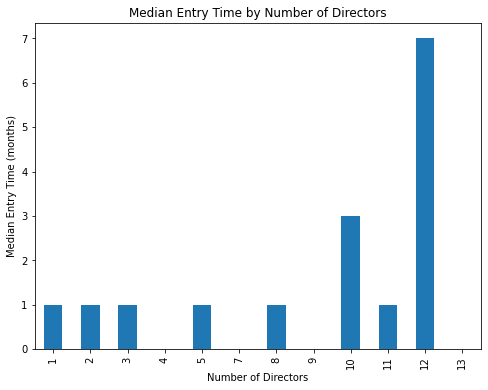

In [40]:
# convert the "date_added" column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# calculate the entry time in years
df['entry_time'] = df['date_added'].dt.year - df['release_year'] 

# count the number of directors in each row of the "directors" column
df['num_directors'] = df['director'].apply(lambda x: len(str(x).split(',')))

# group the dataframe by the "num_directors" column and calculate the mean entry time for each group
mean_entry_time_by_directors = df.groupby('num_directors')['entry_time'].mean()

# group the dataframe by the "num_directors" column and calculate the median entry time for each group
median_entry_time_by_directors = df.groupby('num_directors')['entry_time'].median()

# plot a bar graph of the median entry time by the number of directors
median_entry_time_by_directors.plot(kind='bar', figsize=(8,6))
plt.title('Median Entry Time by Number of Directors')
plt.xlabel('Number of Directors')
plt.ylabel('Median Entry Time (months)')
plt.show()

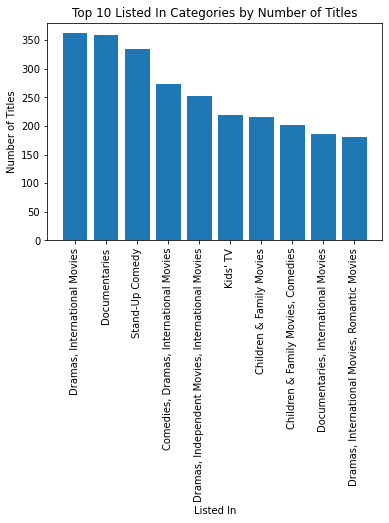

In [44]:
# Group the dataset by the "listed_in" variable and calculate the number of titles
num_titles = df.groupby('listed_in')['title'].count()

# Sort the categories by the number of titles and select the top 10
top_categories = num_titles.sort_values(ascending=False)[:10]

# Create a bar graph
plt.bar(top_categories.index, top_categories.values)
plt.xticks(rotation=90)
plt.xlabel('Listed In')
plt.ylabel('Number of Titles')
plt.title('Top 10 Listed In Categories by Number of Titles')
plt.show()

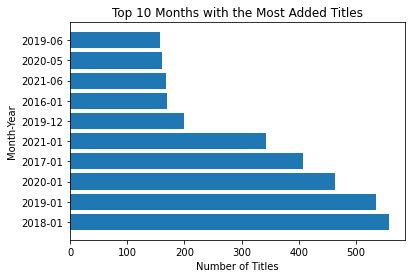

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# convert the "date_added" column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# extract the month and year from the "date_added" column
df['month_year'] = df['date_added'].apply(lambda x: x.strftime('%Y-%m'))

# group the data by month and year and count the number of titles added in each month-year group
counts = df.groupby('month_year')['title'].count()

# sort the resulting counts in descending order and get the top 10 months
top_10_months = counts.sort_values(ascending=False)[:10]

# create a horizontal bar chart of the top 10 months
plt.barh(top_10_months.index, top_10_months.values)

# set the chart title and axis labels
plt.title('Top 10 Months with the Most Added Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Month-Year')

# show the chart
plt.show()


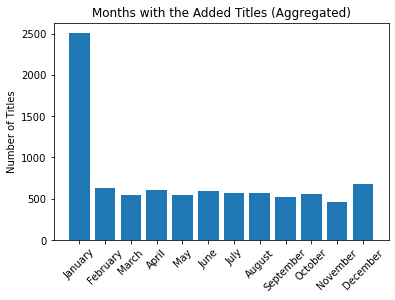

In [30]:
import calendar
# convert the "date_added" column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# extract the month and year from the "date_added" column
df['month'] = df['date_added'].apply(lambda x: x.month)

# aggregate the data for the same month across all years
counts = df.groupby('month')['title'].count()

# sort the resulting counts in descending order and get the top 12 months
top_12_months = counts.sort_values(ascending=False)[:12]

# create a vertical bar chart of the top 12 months
plt.bar(top_12_months.index, top_12_months.values)

# set the chart title and axis labels
plt.title('Months with the Added Titles (Aggregated)')
plt.xticks(range(1, 13), calendar.month_name[1:13], rotation=45)
plt.ylabel('Number of Titles')

# show the chart
plt.show()


<AxesSubplot:title={'center':'Number of Titles by Rating'}, xlabel='rating'>

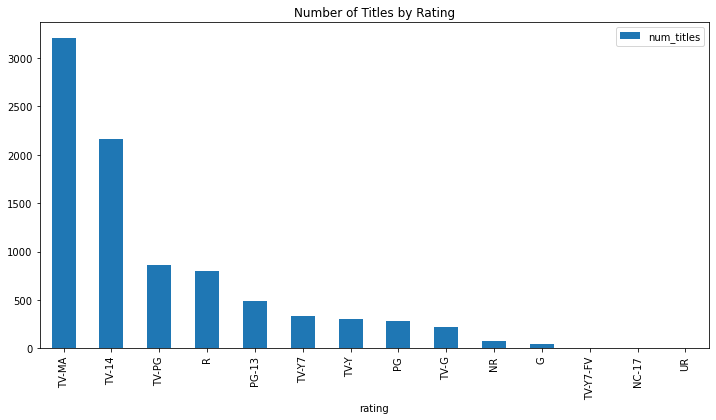

In [17]:
# Group data by rating and count the number of titles
grouped = df.groupby('rating')['title'].count().reset_index(name='num_titles')

# Sort the data by number of titles in descending order
sorted_data = grouped.sort_values(by='num_titles', ascending=False)

# Plot the data
sorted_data.plot(kind='bar', x='rating', y='num_titles', figsize=(12,6), title='Number of Titles by Rating')


<AxesSubplot:title={'center':'Median Duration of TV Shows by Category'}, xlabel='category'>

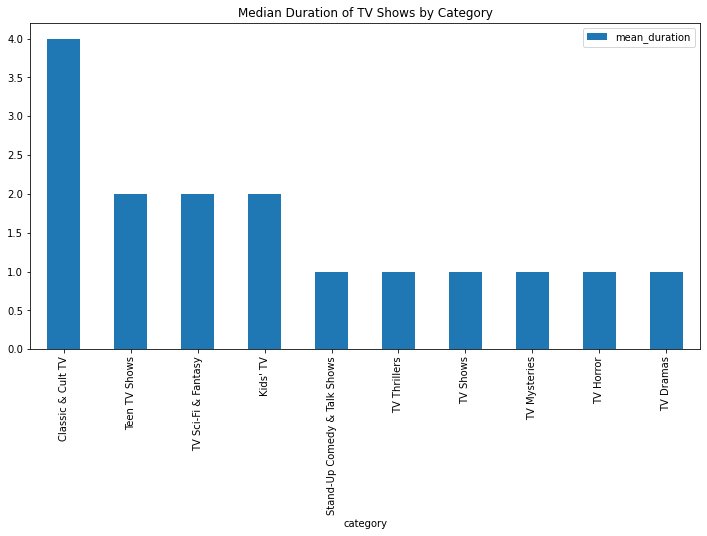

In [18]:
# Filter data to only include TV shows
tv_shows = df[df['type'] == 'TV Show']

# Split the "listed_in" column into separate rows
listed_in = tv_shows['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('category')

# Join the "category" column back to the original data
tv_shows = tv_shows.drop('listed_in', axis=1).join(listed_in)

# Group data by category and calculate the mean duration
grouped = tv_shows.groupby('category')['duration'].apply(lambda x: x.str.split(' ').str[0].astype(float).median()).reset_index(name='mean_duration')

# Sort the data by mean duration in descending order
sorted_data = grouped.sort_values(by='mean_duration', ascending=False)

# Plot the top 10 categories
top_categories = sorted_data.head(10)
top_categories.plot(kind='bar', x='category', y='mean_duration', figsize=(12,6), title='Median Duration of TV Shows by Category')


In [19]:
# Convert date_added to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Calculate the entry time in years
df['entry_time'] = (df['date_added'].dt.year - df['release_year'])

# Print the result
print(df[['title', 'release_year', 'date_added', 'entry_time']].head())


                              title  release_year date_added  entry_time
0              Dick Johnson Is Dead          2020 2021-09-25           1
1                         Ganglands          2021 2021-09-24           0
2                     Midnight Mass          2021 2021-09-24           0
3  Confessions of an Invisible Girl          2021 2021-09-22           0
4                           Sankofa          1993 2021-09-24          28


In [20]:
# Group data by country and calculate the mean entry time
grouped_by_country = df.groupby('country')['entry_time'].mean().reset_index(name='mean_entry_time_by_country')

# Group data by listed_in and calculate the mean entry time
grouped_by_category = df.groupby('listed_in')['entry_time'].mean().reset_index(name='mean_entry_time_by_category')

# Print the results
print(grouped_by_country.head())
print(grouped_by_category.head())

      country  mean_entry_time_by_country
0   Argentina                    3.144737
1   Australia                    3.517544
2     Austria                    1.111111
3  Bangladesh                    2.000000
4     Belarus                    4.000000
                                           listed_in  \
0                                 Action & Adventure   
1                 Action & Adventure, Anime Features   
2  Action & Adventure, Anime Features, Children &...   
3  Action & Adventure, Anime Features, Classic Mo...   
4  Action & Adventure, Anime Features, Horror Movies   

   mean_entry_time_by_category  
0                     8.015625  
1                     0.000000  
2                     1.000000  
3                    39.500000  
4                     5.000000  


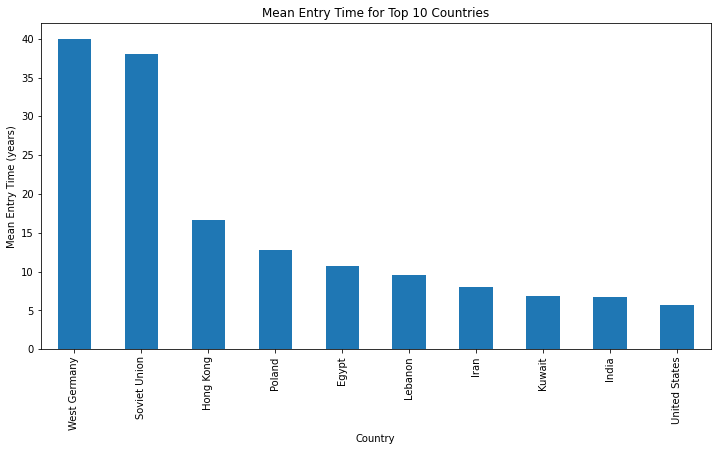

In [21]:
import matplotlib.pyplot as plt

# Group data by country and calculate the mean entry time
mean_entry_time_by_country = df.groupby('country')['entry_time'].mean()

# Get the top 10 countries with the highest mean entry time
top_10_countries = mean_entry_time_by_country.nlargest(10)

# Create a bar graph showing the mean entry time for the top 10 countries
plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar')
plt.title('Mean Entry Time for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Mean Entry Time (years)')
plt.show()

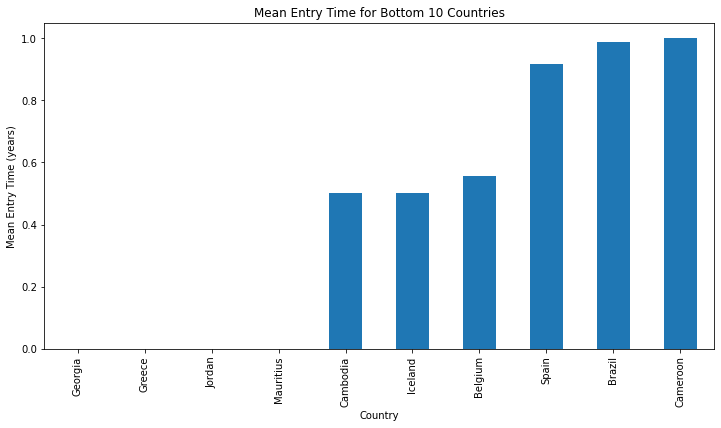

In [22]:
# Get the bottom 10 countries with the lowest mean entry time
bottom_10_countries = mean_entry_time_by_country.nsmallest(10)

# Create a bar graph showing the mean entry time for the bottom 10 countries
plt.figure(figsize=(12, 6))
bottom_10_countries.plot(kind='bar')
plt.title('Mean Entry Time for Bottom 10 Countries')
plt.xlabel('Country')
plt.ylabel('Mean Entry Time (years)')
plt.show()

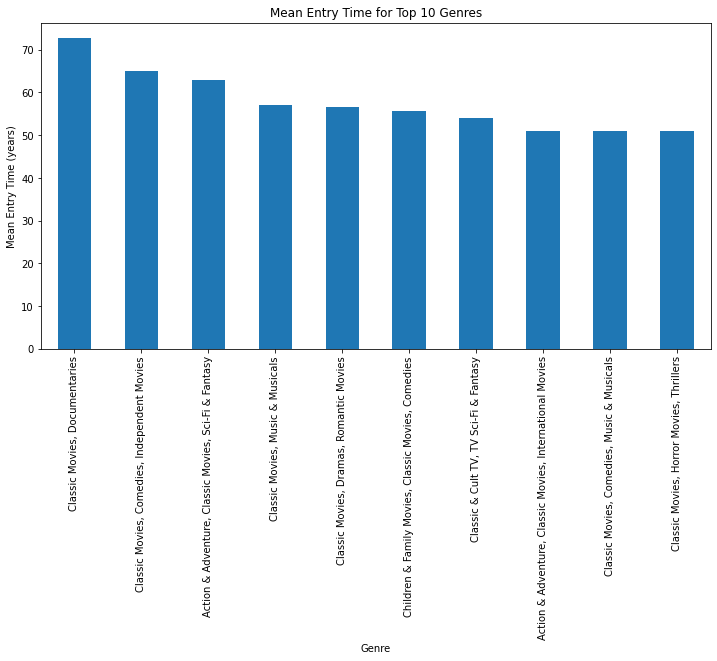

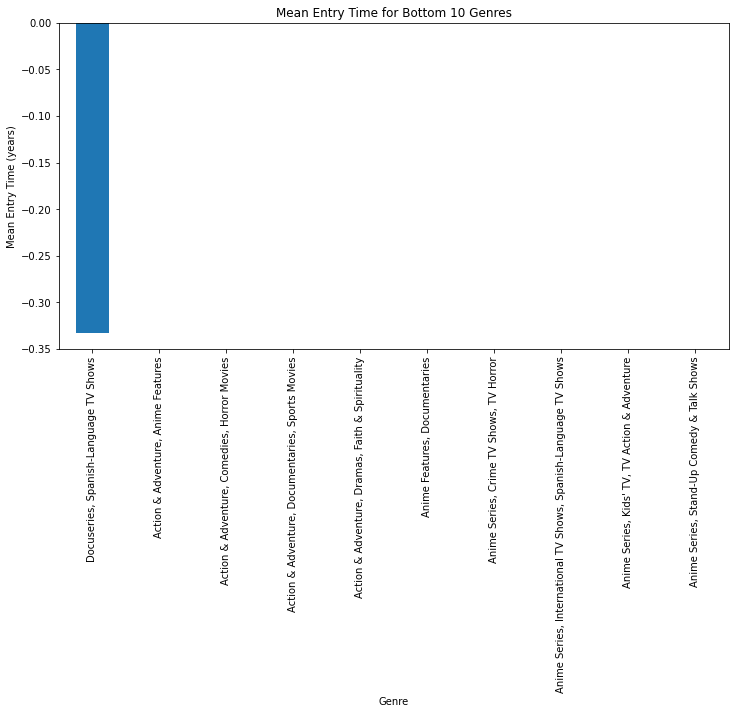

In [23]:
# Group data by listed_in and calculate the mean entry time
mean_entry_time_by_genre = df.groupby('listed_in')['entry_time'].mean()

# Get the top 10 genres with the highest mean entry time
top_10_genres = mean_entry_time_by_genre.nlargest(10)

# Create a bar graph showing the mean entry time for the top 10 genres
plt.figure(figsize=(12, 6))
top_10_genres.plot(kind='bar')
plt.title('Mean Entry Time for Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Mean Entry Time (years)')
plt.show()

# Get the bottom 10 genres with the lowest mean entry time
bottom_10_genres = mean_entry_time_by_genre.nsmallest(10)

# Create a bar graph showing the mean entry time for the bottom 10 genres
plt.figure(figsize=(12, 6))
bottom_10_genres.plot(kind='bar')
plt.title('Mean Entry Time for Bottom 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Mean Entry Time (years)')
plt.show()